## Sentiment Analysis of Bitcoin

# Step 1. Collect Raw Tweets

To collect the fresh tweets, I followed the example from [Microsoft](https://docs.microsoft.com/en-us/azure/hdinsight/hdinsight-analyze-twitter-data-linux). I like this method very much because it contains a progress bar so you know the progress in real time. This could be very important especially when you collect some topics which are not that hot. It can take several hours. One problem you may don't like it is that the "progressbar" package is only available for python 2.7.

To restrict the topic on bitcoin, I have added "bitcoin' and "cryptocurrency" as the filter. I have collected 10000 tweets in total.

### Step 2. Load Packages and Data

In [1]:
import json
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import string
from textblob import TextBlob

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## convert tweet json file into table
def convert_json_dataframe(filename):

    tweets = []
    with open(filename, 'r') as f:
        for line in f:
            if (line.strip()):  
                tweets.append(json.loads(line))
    return pd.DataFrame(tweets)       

In [3]:
tweets = convert_json_dataframe('tweets_0106.txt')
tweets.shape

(10000, 35)

### Step 3. Generate Word Cloud

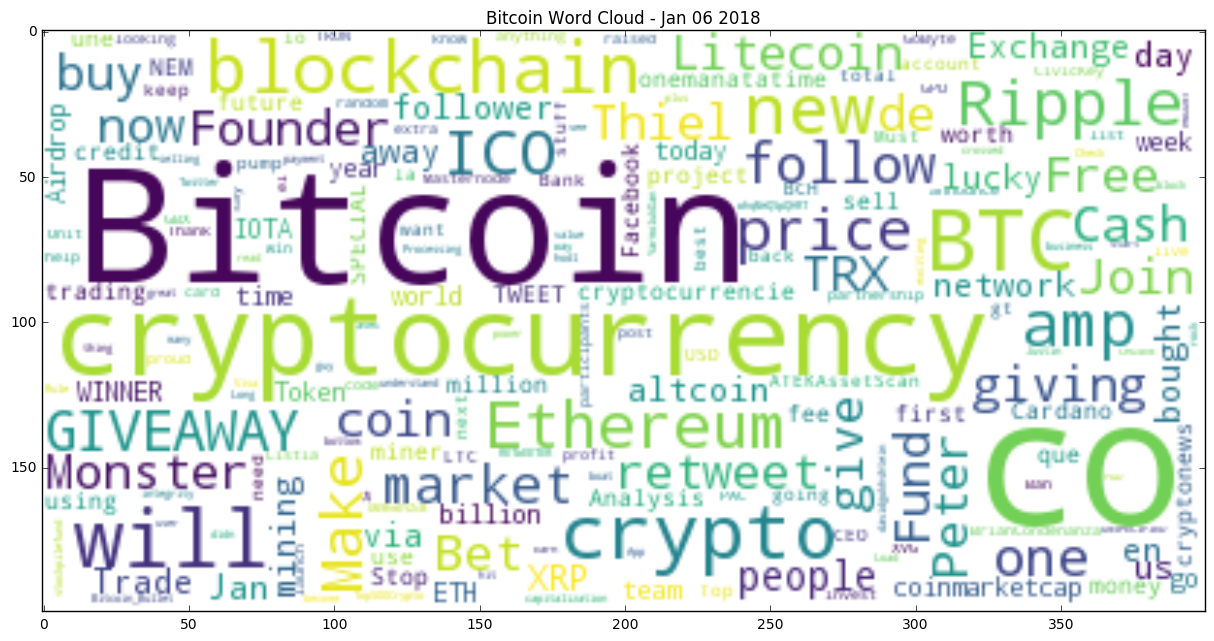

In [4]:
# Creat a stopword list
stopwords = list(STOPWORDS) + list(string.punctuation) + ["http", "https", "RT"]

# generate text
strings = ''
for text in tweets['text']:
    strings += text

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=60
                      , background_color="white"
                      , stopwords=stopwords
                      , collocations=False
                     ).generate_from_text(strings)

# Display the generated image with matplotlib 
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title('Bitcoin Word Cloud - Jan 06 2018')
plt.axis("on")
plt.savefig("wordcloud.png")
plt.show()

### Step 4. Sentiment Analysis

In [5]:
def sentimentEvaluation(t):
   
    blob = TextBlob(t)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

In [6]:
tweets['sentiment'] = tweets['text'].map(lambda tx: sentimentEvaluation(tx))
tweets['sentiment'][:10]

0    positive
1     neutral
2     neutral
3    positive
4    positive
5     neutral
6    positive
7     neutral
8    positive
9     neutral
Name: sentiment, dtype: object

### Step 5. Visualization

In [7]:
senti_sum = tweets.sentiment.value_counts()
senti_sum

neutral     5493
positive    3698
negative     809
Name: sentiment, dtype: int64

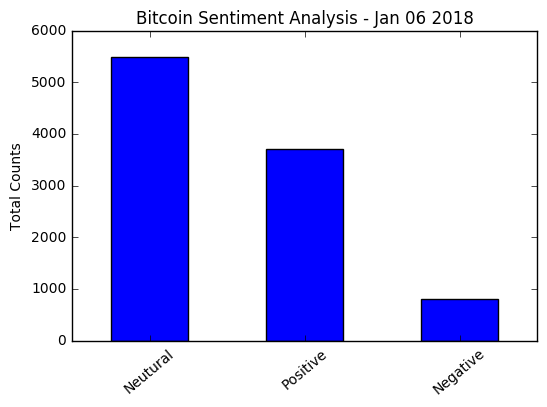

In [8]:
#fig = plt.figure(figsize=(6,4))
senti_sum.plot(kind='bar')

plt.title('Bitcoin Sentiment Analysis - Jan 06 2018')
plt.ylabel('Total Counts')
plt.xticks(range(3), ('Neutural', 'Positive', 'Negative'), rotation=40)
plt.savefig("sentiment.png")
plt.show()